# import and clean data

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(color_codes= True)
%matplotlib inline 
#hiding some random error flags due to different fonts used in the dataset
import warnings
warnings.filterwarnings("ignore")

#I uploaded the data set to my googlt drive and created a download link for the file.
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1pNbx0yYc6aEKSVNt2liyRYiz04vfJ3Pc')

#replacing NaN as 0 because all other values are 1 indicating true, so assume NaN to indicate false and hence 0
df['has_urgency_banner']= pd.to_numeric(df.replace({'has_urgency_banner':{np.nan:0}})['has_urgency_banner'])

#filling 0 instead f NaN to indicate no rating given

df["rating_five_count"]= pd.to_numeric(df.replace({"rating_five_count":{np.nan:0}})["rating_five_count"])
df["rating_four_count"]= pd.to_numeric(df.replace({"rating_four_count":{np.nan:0}})["rating_four_count"])
df["rating_three_count"]= pd.to_numeric(df.replace({"rating_three_count":{np.nan:0}})["rating_three_count"])
df["rating_two_count"]= pd.to_numeric(df.replace({"rating_two_count":{np.nan:0}})["rating_two_count"])
df["rating_one_count"]= pd.to_numeric(df.replace({"rating_one_count":{np.nan:0}})["rating_one_count"])
df["rating_count"]= df["rating_count"].astype(float) #Convert to float

edit2=(df['product_variation_size_id'])
for i in range(df.shape[0]):
  size=df.iloc[i]['product_variation_size_id']
  size=str(size)
  size= size.upper()
  size= size.replace('SIZE','')
  size= size.replace('.','')
  size= size.replace('-','')
  size= size.replace(' ','')
  size= size.replace(".", "")
  size= size.replace("SUIT", "")

  edit2[i]=size
df['product_variation_size_id']=pd.Series(edit2)

df.iloc[765]["product_variation_size_id"]= "XL"
df.iloc[877]["product_variation_size_id"]= "S"
df.iloc[708:711]["product_variation_size_id"]= "S"
df.loc[:,"product_variation_size_id"]= df.replace({"product_variation_size_id":{"ONE":1,"2XL":"XXL",\
                                      "XXXL":"3XL","XXXXL":"4XL","XXXXXL":"5XL","2XS":"XXS","XXXS":"3XS"}})["product_variation_size_id"]
display(df)
#df['product_variation_size_id'].unique()

title  ... crawl_month
0     2020 Summer Vintage Flamingo Print  Pajamas Se...  ...     2020-08
1     SSHOUSE Summer Casual Sleeveless Soirée Party ...  ...     2020-08
2     2020 Nouvelle Arrivée Femmes Printemps et Été ...  ...     2020-08
3     Hot Summer Cool T-shirt pour les femmes Mode T...  ...     2020-08
4     Femmes Shorts d'été à lacets taille élastique ...  ...     2020-08
...                                                 ...  ...         ...
1568  Nouvelle Mode Femmes Bohême Pissenlit Imprimer...  ...     2020-08
1569  10 couleurs femmes shorts d'été lacent ceintur...  ...     2020-08
1570  Nouveautés Hommes Siwmwear Beach-Shorts Hommes...  ...     2020-08
1571  Mode femmes d'été sans manches robes col en V ...  ...     2020-08
1572  Pantalon de yoga pour femmes à la mode Slim Fi...  ...     2020-08

[1573 rows x 43 columns]

# 2a

In [93]:
print(df['units_sold'].unique())

[   100  20000   5000     10  50000   1000  10000 100000     50      1
      7      2      3      8      6]


In [94]:
dfx=df[df['units_sold']>=10].reset_index().drop('index',axis=1).reset_index()
#display(df)
dfx=pd.DataFrame([dfx['index'],dfx['units_sold'],dfx['price'],dfx['rating']]).T

df1=dfx[dfx['units_sold']==50].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df2=dfx[dfx['units_sold']==100].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df3=dfx[dfx['units_sold']==1000].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df4=dfx[dfx['units_sold']==5000].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df5=dfx[dfx['units_sold']==10000].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()
df6=dfx[dfx['units_sold']==20000].reset_index().drop('index',axis=1).drop('level_0',axis=1).groupby(['price']).mean().reset_index()


#display(df1)
print("\nFor Units Sold="+str(df1['units_sold'][0])+":")
print("  Mean Rating="+str(df1['rating'].mean()))
print("  Variance of Ratings="+str(df1['rating'].var(ddof=1))+"\n") 

#display(df2)
print("\nFor Units Sold="+str(df2['units_sold'][0])+":")
print("  Mean Rating="+str(df2['rating'].mean()))
print("  Variance of Ratings="+str(df2['rating'].var(ddof=1))+"\n") 

#display(df3)
print("\nFor Units Sold="+str(df3['units_sold'][0])+":")
print("  Mean Rating="+str(df3['rating'].mean()))
print("  Variance of Ratings="+str(df3['rating'].var(ddof=1))+"\n") 

#display(df4)
print("\nFor Units Sold="+str(df4['units_sold'][0])+":")
print("  Mean Rating="+str(df4['rating'].mean()))
print("  Variance of Ratings="+str(df4['rating'].var(ddof=1))+"\n")

#display(df5)
print("\nFor Units Sold="+str(df5['units_sold'][0])+":")
print("  Mean Rating="+str(df5['rating'].mean()))
print("  Variance of Ratings="+str(df5['rating'].var(ddof=1))+"\n")

#display(df6)
print("\nFor Units Sold="+str(df6['units_sold'][0])+":")
print("  Mean Rating="+str(df6['rating'].mean()))
print("  Variance of Ratings="+str(df6['rating'].var(ddof=1))+"\n")


For Units Sold=50.0:
  Mean Rating=3.832435897435898
  Variance of Ratings=0.780606495726496


For Units Sold=100.0:
  Mean Rating=3.759228810873586
  Variance of Ratings=0.2366208268277151


For Units Sold=1000.0:
  Mean Rating=3.7478963829182974
  Variance of Ratings=0.08691071322370557


For Units Sold=5000.0:
  Mean Rating=3.7833707605062226
  Variance of Ratings=0.06079174183458021


For Units Sold=10000.0:
  Mean Rating=3.9386464503750216
  Variance of Ratings=0.05374382288856308


For Units Sold=20000.0:
  Mean Rating=3.9356065918653576
  Variance of Ratings=0.07712795044526202



# 2b


For Units Sold=50.0:


<Figure size 720x360 with 0 Axes>

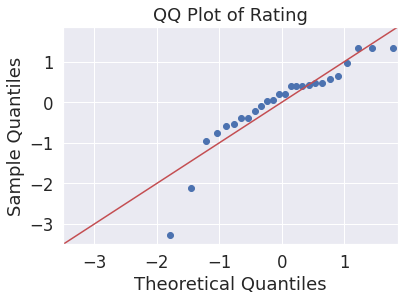


For Units Sold=100.0:


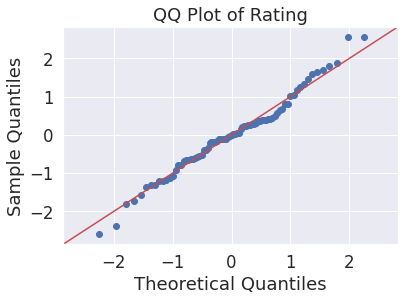


For Units Sold=1000.0:


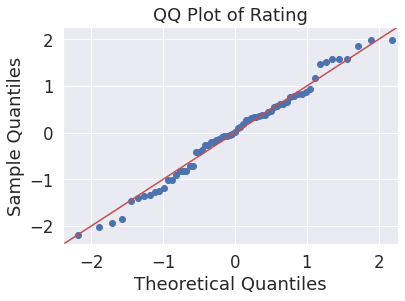


For Units Sold=5000.0:


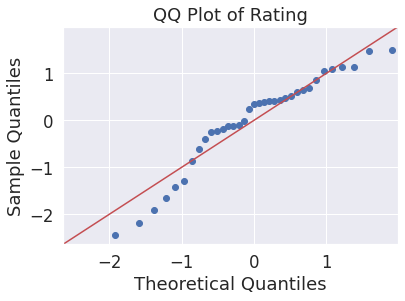


For Units Sold=10000.0:


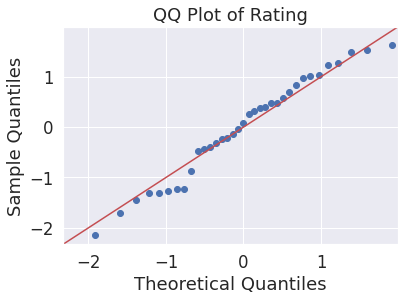


For Units Sold=20000.0:


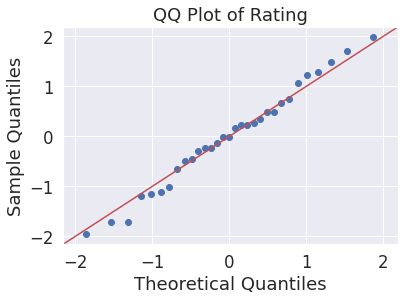

In [95]:
import statsmodels.api as sm
plt.figure(figsize=(10,5))
sns.set(font_scale=1.5) 
print("\nFor Units Sold="+str(df1['units_sold'][0])+":")
sm.qqplot(df1['rating'], fit=True, line="45")
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df2['units_sold'][0])+":")
sm.qqplot(df2['rating'], fit=True, line="45")
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df3['units_sold'][0])+":")
sm.qqplot(df3['rating'], fit=True, line="45")
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df4['units_sold'][0])+":")
sm.qqplot(df4['rating'], fit=True, line="45")
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df5['units_sold'][0])+":")
sm.qqplot(df5['rating'], fit=True, line="45")
plt.title('QQ Plot of Rating')
plt.show()
print("\nFor Units Sold="+str(df6['units_sold'][0])+":")
sm.qqplot(df6['rating'], fit=True, line="45")
plt.title('QQ Plot of Rating')
plt.show()

# 2c & 2d

$p(x)= \frac{1}{\sqrt{2\pi}\sigma}exp(\frac{-(x-\mu)^2}{\sigma^2})$

$Log \ Likelihood= \frac{-1}{2\sigma^2}\sum_{i=1}^{n}(x_i-\mu)^2 -\frac{n}{2}\log{2\pi\sigma^2} \$

$\mu= Population \ mean$

$\bar{x}= Sample \ mean$

$P[|\mu - \bar{x}| \leq \epsilon] \leq \alpha$

$ If \ \alpha=0.05\, we \ say \ with \ 95\% \ confidence \ that \ \mu \ lies \ in \ (\bar{x}-\epsilon, \bar{x}+\epsilon)$

$P[ \bar{x}-\epsilon \leq \mu \leq \bar{x}+\epsilon] \leq \alpha  \implies \epsilon=\frac{ z_{\alpha/2}\sigma}{\sqrt{n}}$

$ For \ X \ \sim N(0,1) \ z_{\alpha/2} is \ s.t \ P[X\leq z_{\alpha/2}]= 1-\frac{\alpha}{2} $

In [96]:
import scipy
import scipy.stats as st
mean=df1['rating'].mean()
var=df1['rating'].var(ddof=0)
n=len(df1['rating'])
dif=df1['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df1['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=st.sem(df1['rating']))))
#print("\n95% Confidence Interval:"+str(sm.stats.proportion_confint())))

mean=df2['rating'].mean()
var=df2['rating'].var(ddof=0)
n=len(df2['rating'])
dif=df2['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df2['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=st.sem(df2['rating']))))

mean=df3['rating'].mean()
var=df3['rating'].var(ddof=0)
n=len(df3['rating'])
dif=df3['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df3['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=st.sem(df3['rating']))))

mean=df4['rating'].mean()
var=df4['rating'].var(ddof=0)
n=len(df4['rating'])
dif=df4['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df4['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=st.sem(df4['rating']))))

mean=df5['rating'].mean()
var=df5['rating'].var(ddof=0)
n=len(df5['rating'])
dif=df5['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df5['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=st.sem(df5['rating']))))

mean=df6['rating'].mean()
var=df6['rating'].var(ddof=0)
n=len(df6['rating'])
dif=df6['rating']-mean
for i in range(len(dif)):
  dif[i]=dif[i]**2
#print(n)#print(mean)#print(var)#print(dif)
logl=np.log(((2*np.pi*var)**(-n/2))*np.exp(-1*np.sum(dif)/(2*var)))
print("\nFor Units Sold="+str(df6['units_sold'][0])+"\nLog Likelihood: "+str(logl))
print("95% Confidence Interval:"+str(stats.norm.interval(0.95, loc=mean, scale=st.sem(df6['rating']))))


For Units Sold=50.0
Log Likelihood: -33.16263925570937
95% Confidence Interval:(3.492828221721944, 4.1720435731498515)

For Units Sold=100.0
Log Likelihood: -56.05840874330036
95% Confidence Interval:(3.653295617252179, 3.8651620044949926)

For Units Sold=1000.0
Log Likelihood: -12.72883476753809
95% Confidence Interval:(3.677305705980492, 3.818487059856103)

For Units Sold=5000.0
Log Likelihood: -0.15029359120777985
95% Confidence Interval:(3.701686879792512, 3.865054641219933)

For Units Sold=10000.0
Log Likelihood: 2.0061477108033055
95% Confidence Interval:(3.8618434216971864, 4.015449479052857)

For Units Sold=20000.0
Log Likelihood: -3.7633643727248107
95% Confidence Interval:(3.8378439026369935, 4.033369281093721)


# 2e

In [97]:
means=[df1['rating'].mean(),df2['rating'].mean(),df3['rating'].mean(),df4['rating'].mean(),df5['rating'].mean(),df6['rating'].mean()]
print(means)

[3.832435897435898, 3.759228810873586, 3.7478963829182974, 3.7833707605062226, 3.9386464503750216, 3.9356065918653576]


Closest mean suicide rates are for Units sold=10000(1) and  Units Sold=20000(2)\
Doing Welch Test and Wilcoxon signed rank test with with 95% confidence\
Null Hypothesis ( H0 ): Both Mean suicide rates are the same\
Alternate Hypothesis ( H1 ): Both mean suicide rates are actually different

i) Welch t-test

In [98]:
rate1=np.array(df5['rating'])
x1= rate1.mean()
s1=rate1.std(ddof=1)
n1=len(rate1)

rate2=np.array(df6['rating'])
x2=rate2.mean()
s2=rate2.std(ddof=1)
n2=len(rate2)
#print(x1,s1,n1,x2,s2,n2)

t=(x1-x2)/np.sqrt(s1**2/n1 + s2**2/n2)
print(f'Welch t test= {t}')

Welch t test= 0.04792359765748455


In [99]:
alpha=0.05 #for 95% confidence
t, pval= st.ttest_ind(rate1, rate2, equal_var= False)

print("t-value = %f"%t)
print("Significance Level = %d%%"%(alpha*100))
print("P-value = %f"%pval)
if alpha >= pval:
    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")

t-value = 0.047924
Significance Level = 5%
P-value = 0.961940
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


ii) Wilcoxon signed rank test

In [100]:
n=len(df6['rating'])
print(n)
df5=df5.loc[0:n-1]
rate1=np.array(df5['rating'])
rate2=np.array(df6['rating'])
#making both of same length for this test
_, pval = st.wilcoxon(x=rate1, y=rate2)
print("Significance Level = %d %%"%(alpha*100))
print("P-value = %f"%pval)
if alpha >= pval:

    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")

31
Significance Level = 5 %
P-value = 0.753855
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


# 2f

Confidence Level is **95%**\
Null Hypothesis ($H_0$): $\overline{d}$ actually equals 0\
Alternate Hypothesis ($H_1$): $\overline{d}$ $\neq$ 0

In [101]:
#rate1 and rate2 redefined in ques 1e)ii
d= rate1-rate2 #Pairing Parameter, paired by their difference
d_bar= d.mean() #Sample Mean

#Can we say with 95% Confidence that d_bar != 0 ?
t, pval= st.ttest_1samp(d, 0)

print("t-value = %f"%t)
print("Significance Level = %d%%"%(alpha*100,))
print("P-value = %f"%pval)
if alpha >= pval:
    print("Null Hypothesis rejected. So, the mean suicide rates of Spain and UK truly differ from each other")
else:
    print("Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same")

t-value = -0.263675
Significance Level = 5%
P-value = 0.793833
Failed to reject Null Hypothesis. So, the mean suicide rates of Spain and UK are essentially the same


# 2g

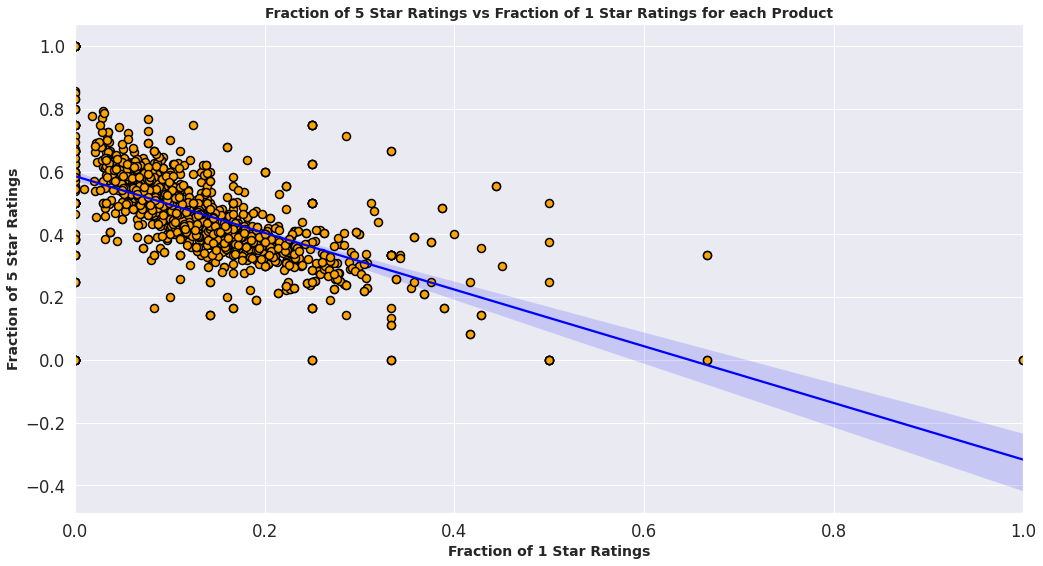

In [102]:
plt.subplots(figsize=(17,9))
plt.plot(df['rating_one_count']/df['rating_count'],df['rating_five_count']/df['rating_count'], 'o',mec='black', mew=1.5, color='orange',ms=8)
sns.regplot(df['rating_one_count']/df['rating_count'],df['rating_five_count']/df['rating_count'], color='blue')
plt.xlabel("Fraction of 1 Star Ratings", size=14, fontweight='bold')
plt.ylabel("Fraction of 5 Star Ratings", size=14, fontweight='bold')
plt.title("Fraction of 5 Star Ratings vs Fraction of 1 Star Ratings for each Product", fontsize=14, fontweight='bold')
plt.show();

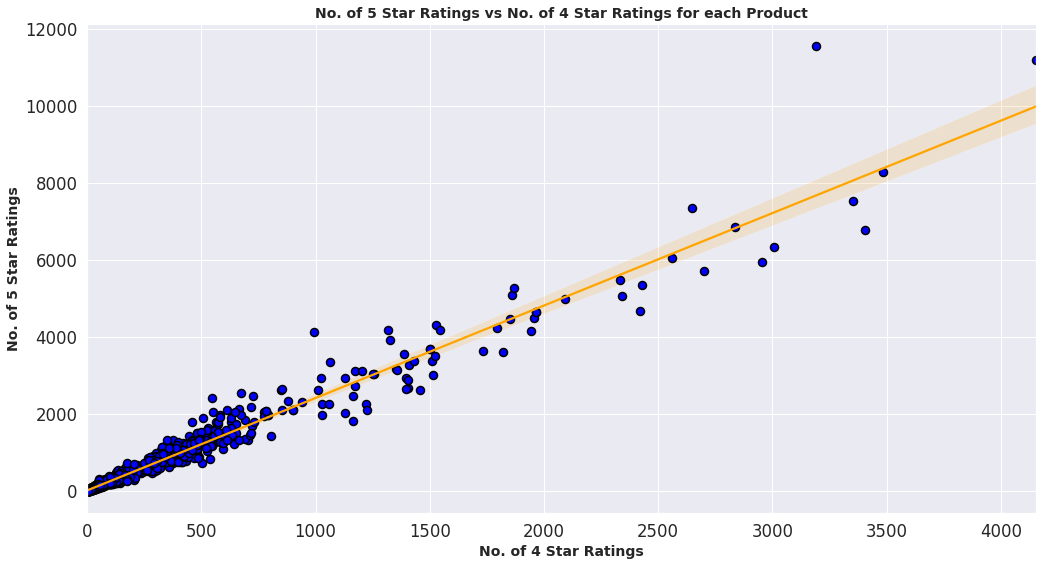

In [103]:
plt.subplots(figsize=(17,9))
plt.plot(df['rating_four_count'],df['rating_five_count'], 'o',mec='black', mew=1.5, color='blue',ms=8)
sns.regplot(df['rating_four_count'],df['rating_five_count'], color='orange')
plt.xlabel("No. of 4 Star Ratings", size=14, fontweight='bold')
plt.ylabel("No. of 5 Star Ratings", size=14, fontweight='bold')
plt.title("No. of 5 Star Ratings vs No. of 4 Star Ratings for each Product", fontsize=14, fontweight='bold')
plt.show();

In [104]:
dfx=pd.DataFrame([df['rating_count'],df['rating'],df['price'],df['units_sold']]).T
display(dfx)

rating_count  rating  price  units_sold
0             54.0    3.76  16.00       100.0
1           6135.0    3.45   8.00     20000.0
2             14.0    3.57   8.00       100.0
3            579.0    4.03   8.00      5000.0
4             20.0    3.10   2.72       100.0
...            ...     ...    ...         ...
1568        1367.0    4.08   6.00     10000.0
1569          28.0    3.07   2.00       100.0
1570          59.0    3.71   5.00       100.0
1571           2.0    2.50  13.00       100.0
1572          14.0    4.07   7.00       100.0

[1573 rows x 4 columns]

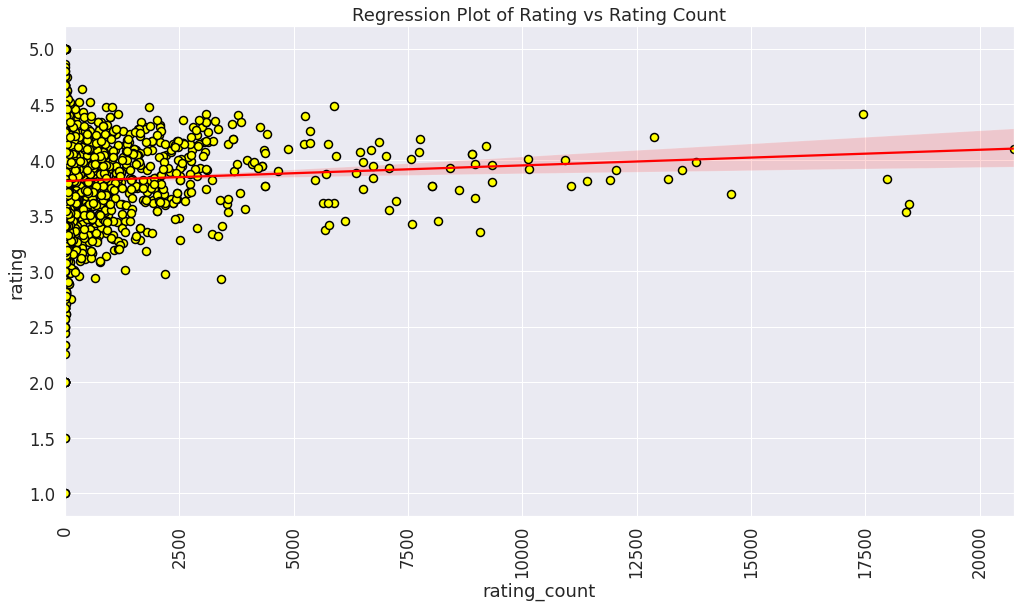

In [105]:
plt.figure(figsize=(17,9))
sns.set(font_scale=1.5)
plt.title('Regression Plot of Rating vs Rating Count')
plt.plot(dfx['rating_count'],dfx['rating'], 'o',mec='black', mew=1.5, color='yellow',ms=8)
sns.regplot(x=dfx['rating_count'],y=dfx['rating'], color='red')
plt.xticks(rotation=90)
plt.show()

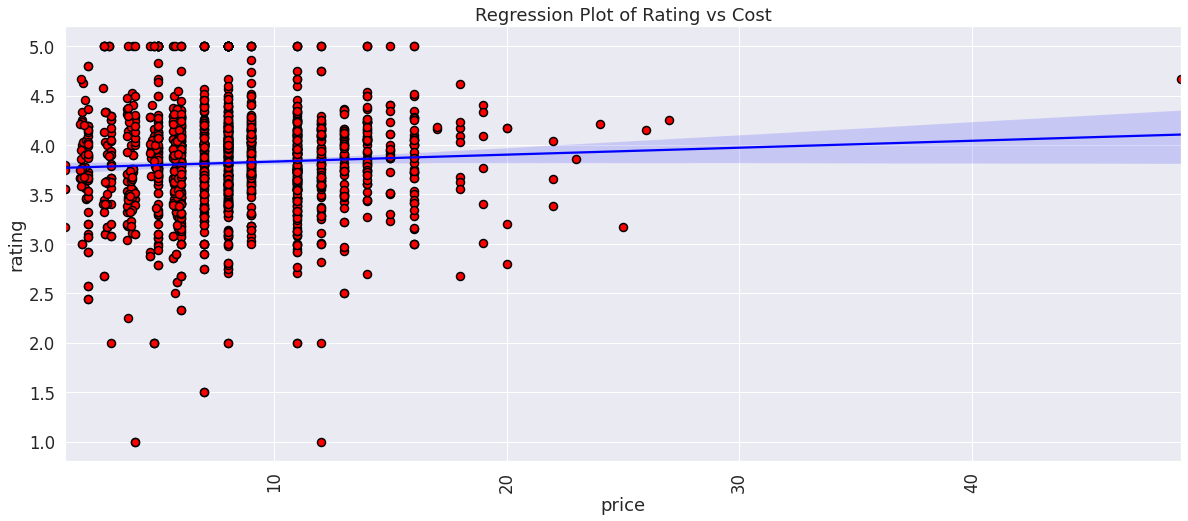

In [106]:
plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
plt.title('Regression Plot of Rating vs Cost')
plt.plot(dfx['price'],dfx['rating'], 'o',mec='black', mew=1.5, color='red',ms=8)
sns.regplot(x=dfx['price'],y=dfx['rating'], color='blue')
plt.xticks(rotation=90)
plt.show()

# 2h

In [107]:
dfx=pd.DataFrame([df['rating'],df['shipping_option_price'],df['units_sold'],df['uses_ad_boosts']]).T
display(dfx)

dfad=dfx.groupby(['uses_ad_boosts']).count()
dfship=dfx.groupby(['shipping_option_price']).count()
dfunits=dfx.groupby(['units_sold']).count()

display(dfad)
display(dfship)
display(dfunits)

rating  shipping_option_price  units_sold  uses_ad_boosts
0       3.76                    4.0       100.0             0.0
1       3.45                    2.0     20000.0             1.0
2       3.57                    3.0       100.0             0.0
3       4.03                    2.0      5000.0             1.0
4       3.10                    1.0       100.0             1.0
...      ...                    ...         ...             ...
1568    4.08                    2.0     10000.0             1.0
1569    3.07                    1.0       100.0             1.0
1570    3.71                    2.0       100.0             0.0
1571    2.50                    3.0       100.0             0.0
1572    4.07                    2.0       100.0             1.0

[1573 rows x 4 columns]

rating  shipping_option_price  units_sold
uses_ad_boosts                                           
0.0                892                    892         892
1.0                681                    681         681

rating  units_sold  uses_ad_boosts
shipping_option_price                                    
1.0                       308         308             308
2.0                       619         619             619
3.0                       520         520             520
4.0                        76          76              76
5.0                        32          32              32
6.0                        12          12              12
7.0                         5           5               5
12.0                        1           1               1

rating  shipping_option_price  uses_ad_boosts
units_sold                                               
1.0              3                      3               3
2.0              2                      2               2
3.0              2                      2               2
6.0              1                      1               1
7.0              2                      2               2
8.0              4                      4               4
10.0            49                     49              49
50.0            76                     76              76
100.0          509                    509             509
1000.0         405                    405             405
5000.0         217                    217             217
10000.0        177                    177             177
20000.0        103                    103             103
50000.0         17                     17              17
100000.0         6                      6               6

In [108]:
print(scipy.stats.chisquare(dfad['rating']))
print(scipy.stats.chisquare(dfship['rating']))
print(scipy.stats.chisquare(dfunits['rating']))

Power_divergenceResult(statistic=28.30324221233312, pvalue=1.0372211455897217e-07)
Power_divergenceResult(statistic=2268.805467260013, pvalue=0.0)
Power_divergenceResult(statistic=3392.095359186269, pvalue=0.0)


Thus, we see that the possibility of existence of the second and third frequency distributions seem very improbable(p-value=0(<any confidence value), and the first slightly probable(p-value~0), according to the chi-squared test.\
The null hypothesis is rejected in these cases